# Text Emotions Classification
Bu projede metinleri duygu durumuna göre sınıflayan bir model geliştiriyoruz.
<br>Projede kullanılan veriler <a href="https://thecleverprogrammer.com/2023/02/06/text-emotions-classification-using-python/" href="_blank">
buradan</a> temin edilmiştir.
<br><br>
Projede kullanılan metinler aşağıdaki sınıflardan oluşmaktadır:
* Anger (Öfke): 😡
* Fear (Korku): 😨
* Joy (Sevinç): 😄
* Love (Aşk): ❤️
* Sadness (Üzüntü): 😢
* Surprise (Şaşkınlık): 😮

In [29]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

### Train veri seti ile ön işlemleri yapalım

In [86]:
df=pd.read_csv("train.txt", sep=";", header=None)
df.columns=["text", "emotion"]

In [87]:
df.head()

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [88]:
df.emotion.value_counts()

emotion
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

In [89]:
# Verileri numara sınıfına dönüştürelim

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["class"] = label_encoder.fit_transform(df["emotion"])

In [90]:
df.head()

,text,emotion,class
0,i didnt feel humiliated,sadness,4
1,i can go from feeling so hopeless to so damned...,sadness,4
2,im grabbing a minute to post i feel greedy wrong,anger,0
3,i am ever feeling nostalgic about the fireplac...,love,3
4,i am feeling grouchy,anger,0


In [91]:
labels = {veri: etiket for veri, etiket in zip(df["emotion"], df["class"])}
classes = [key for key, _ in sorted(labels.items(), key=lambda x: x[1])]
labels, classes

({'sadness': 4, 'anger': 0, 'love': 3, 'surprise': 5, 'fear': 1, 'joy': 2},
 ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'])

Test ve Validation verilerinde kullanılmak üzere etiket sözlüğü (labels) ve sınıf isimleri (classes) oluşturuldu

## NLP Projesi işlem adımları
1. Her şeyi küçük harfe çevirme
2. Noktalama işaretlerini kaldırma
3. Rakamları kaldırma
4. Satır sonları kaldırma (\n, \r)
5. Stopwords (gereksiz) kelimeleri kaldırma
6. Tokenize etme
7. Lemma ve Stema ile ekleri kaldırıp kökleri bulma
8. Vektorize etme

Bu işlemleri daha sonraki veri setlerine de uygulayabilmek için bir fonksiyon tanımlayalım

In [92]:
def clean_text(text):
    # 1- Küçük harfe çevir
    text=text.str.lower()
    # 2 - Noktalama işaretlerini kaldır
    text=text.str.replace('[^\w\s]', '', regex=True)
    # 3 - Rakamları kaldır
    text=text.str.replace('\d+', '', regex=True)
    # 4 - Satır sonu karakterlerini kaldır (^t, ^p)
    text=text.str.replace('\n', '', regex=True)
    text=text.str.replace('\r', '', regex=True)
    return text

In [93]:
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from nltk.stem import PorterStemmer
pr=PorterStemmer()

In [94]:
def lemmafn(text):
    words=TextBlob(text).words
    return [pr.stem(word) for word in words]

In [95]:
# 5,6,7 ve 8. işlemler
vect=CountVectorizer(stop_words="english", ngram_range=(1,2), analyzer=lemmafn)

### Makine Öğrenmesi ile Modelleme

In [96]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [84]:
df["text"]=clean_text(df["text"])

In [30]:
x=np.array(df["text"])
y=np.array(df["class"])

In [31]:
x=vect.fit_transform(x)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=42)

In [33]:
nb=MultinomialNB()

In [34]:
model=nb.fit(x_train, y_train)

In [35]:
tahmin=model.predict(x_test)

In [36]:
accuracy_score(y_test, tahmin)

0.72875

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [52]:
l = LogisticRegression()
kn= KNeighborsClassifier()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
ab = AdaBoostClassifier()
gb= GradientBoostingClassifier()
m = MultinomialNB()
b = BernoulliNB()

modeller=[l, kn, d, r, ab, gb, m, b]
isimler=["LogisticRegression", "KNeighborsClassifier", "DecisionTreeClassifier", "RandomForestClassifier", 
         "AdaBoostClassifier", "GradientBoostingClassifier", "MultinomialNB", "BernoulliNB"]

In [57]:
def algo_test(x, y):

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state = 42)
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
    mdl=[]

    for model in modeller:
        model=model.fit(x_train, y_train)
        tahmin=model.predict(x_test) # if model==kn else x_test)
        mdl.append(model)
        accuracy.append(accuracy_score(y_test, tahmin))
        precision.append(precision_score(y_test, tahmin, average='micro'))
        recall.append(recall_score(y_test, tahmin, average='micro'))
        f1.append(f1_score(y_test, tahmin, average='micro'))
        
    metrics=pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "Model"], index=isimler)
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision  
    metrics["Recall"] = recall
    metrics["F1"] = f1
    metrics["Model"]=mdl

    metrics.sort_values("F1", ascending=False, inplace=True)

    print("En başarılı model: ", metrics.iloc[0].name)
    print(classification_report(metrics.iloc[0,-1].predict(x_test), y_test))
    
    return metrics.drop("Model", axis=1)

In [58]:
algo_test(x,y)

En başarılı model:  LogisticRegression
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       412
           1       0.82      0.84      0.83       388
           2       0.91      0.86      0.88      1081
           3       0.66      0.75      0.70       259
           4       0.91      0.90      0.90       966
           5       0.65      0.79      0.71        94

    accuracy                           0.86      3200
   macro avg       0.80      0.83      0.81      3200
weighted avg       0.86      0.86      0.86      3200



,Accuracy,Precision,Recall,F1
LogisticRegression,0.857500,0.857500,0.857500,0.857500
RandomForestClassifier,0.843750,0.843750,0.843750,0.843750
DecisionTreeClassifier,0.792188,0.792188,0.792188,0.792188
GradientBoostingClassifier,0.781250,0.781250,0.781250,0.781250
MultinomialNB,0.728750,0.728750,0.728750,0.728750
BernoulliNB,0.653750,0.653750,0.653750,0.653750
KNeighborsClassifier,0.385937,0.385937,0.385937,0.385937
AdaBoostClassifier,0.360625,0.360625,0.360625,0.360625


<b>Sonuç: </b> Makine öğrenmesi ile en yüksek başarı oranı %85.8 ile Logistic Regression modeli olmuştur.
<br> Veriler bir de derin öğrenme modeli ile eğitilecektir.

### Derin Öğrenme ile Modelleme

In [71]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [67]:
x = df['text'].values
y = df['class'].values

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [72]:
tokenizer = Tokenizer(num_words=10000) 
tokenizer.fit_on_texts(x_train)

In [73]:
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [75]:
# Ardışıl dizeleri aynı uzunluğa (maksimum dizi uzunluğuna) getirin
max_sequence_length = max([len(x) for x in x_train])
x_train = pad_sequences(x_train, maxlen=max_sequence_length)
x_test = pad_sequences(x_test, maxlen=max_sequence_length)

In [76]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=100, input_length=max_sequence_length))
model.add(LSTM(128))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [77]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
400/400 [==============================] - 22s 14ms/step - loss: 1.1890 - accuracy: 0.5393 - val_loss: 0.5423 - val_accuracy: 0.8072
Epoch 2/10
400/400 [==============================] - 5s 13ms/step - loss: 0.2939 - accuracy: 0.9002 - val_loss: 0.2760 - val_accuracy: 0.9034
Epoch 3/10
400/400 [==============================] - 5s 13ms/step - loss: 0.1348 - accuracy: 0.9531 - val_loss: 0.2720 - val_accuracy: 0.9066
Epoch 4/10
400/400 [==============================] - 5s 13ms/step - loss: 0.0847 - accuracy: 0.9696 - val_loss: 0.2581 - val_accuracy: 0.9091
Epoch 5/10
400/400 [==============================] - 5s 13ms/step - loss: 0.0700 - accuracy: 0.9737 - val_loss: 0.2607 - val_accuracy: 0.9097
Epoch 6/10
400/400 [==============================] - 5s 13ms/step - loss: 0.0460 - accuracy: 0.9834 - val_loss: 0.2893 - val_accuracy: 0.9122
Epoch 7/10
400/400 [==============================] - 5s 13ms/step - loss: 0.0435 - accuracy: 0.9843 - val_loss: 0.3049 - val_accuracy: 0.914

In [79]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

100/100 [==============================] - 1s 7ms/step - loss: 0.3467 - accuracy: 0.9078
Test Loss: 0.3467
Test Accuracy: 0.9078


<b>Sonuç: </b> Derin öğrenme ile %98.9 eğitim, %90.8 ile kontrol başarısı sağlanmıştır.
<br> Şimdi Train veri seti ile eğitim, Test veri seti ile kontrol yapan model geliştirilecektir.

## Test Verileri

In [104]:
df_test=pd.read_csv("test.txt", sep=";")
df_test.columns=["text", "emotion"]

In [106]:
df_test.emotion.value_counts()

emotion
joy         695
sadness     580
anger       275
fear        224
love        159
surprise     66
Name: count, dtype: int64

In [107]:
df_test["class"]=df_test["emotion"].map(labels)

In [108]:
df_test.head()

,text,emotion,class
0,im updating my blog because i feel shitty,sadness,4
1,i never make her separate from me because i do...,sadness,4
2,i left with my bouquet of red and yellow tulip...,joy,2
3,i was feeling a little vain when i did this one,sadness,4
4,i cant walk into a shop anywhere where i do no...,fear,1


In [109]:
df_test["text"]=clean_text(df_test["text"])

In [110]:
X_train = df['text'].values
y_train = df['class'].values
X_test = df_test['text'].values
y_test = df_test['class'].values

In [111]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

In [139]:
word_index_df = pd.DataFrame(list(tokenizer.word_index.items()), columns=['word', 'index'])
word_index_df.to_csv('word_index.csv', index=False)

In [112]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [113]:
# Ardışıl dizeleri aynı uzunluğa (maksimum dizi uzunluğuna) getirin
max_sequence_length = max([len(x) for x in X_train + X_test])
X_train = pad_sequences(X_train, maxlen=max_sequence_length)
X_test = pad_sequences(X_test, maxlen=max_sequence_length)

In [114]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=100, input_length=max_sequence_length))
model.add(LSTM(128))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [115]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
500/500 [==============================] - 7s 11ms/step - loss: 1.0724 - accuracy: 0.5884
Epoch 2/10
500/500 [==============================] - 6s 11ms/step - loss: 0.2311 - accuracy: 0.9228
Epoch 3/10
500/500 [==============================] - 5s 11ms/step - loss: 0.1245 - accuracy: 0.9553
Epoch 4/10
500/500 [==============================] - 6s 11ms/step - loss: 0.0869 - accuracy: 0.9680
Epoch 5/10
500/500 [==============================] - 6s 12ms/step - loss: 0.0576 - accuracy: 0.9778
Epoch 6/10
500/500 [==============================] - 6s 11ms/step - loss: 0.0460 - accuracy: 0.9831
Epoch 7/10
500/500 [==============================] - 6s 11ms/step - loss: 0.0342 - accuracy: 0.9879
Epoch 8/10
500/500 [==============================] - 6s 11ms/step - loss: 0.0352 - accuracy: 0.9871
Epoch 9/10
500/500 [==============================] - 6s 11ms/step - loss: 0.0295 - accuracy: 0.9891
Epoch 10/10
500/500 [==============================] - 5s 11ms/step - loss: 0.0354 - accura

In [116]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

63/63 [==============================] - 1s 8ms/step - loss: 0.3269 - accuracy: 0.9145
Test Loss: 0.3269
Test Accuracy: 0.9145


In [149]:
def pred_text(text):
    text_sequence = tokenizer.texts_to_sequences([text])
    text_sequence = pad_sequences(text_sequence, maxlen=max_sequence_length)
    tahmin = model.predict(text_sequence)
    return label_encoder.inverse_transform([tahmin.argmax()])[0]

In [154]:
msg="i can have for a treat or if i am feeling festive"
pred_text(msg)

1/1 [==============================] - 0s 38ms/step


'joy'

In [152]:
msg="""I woke up this morning with a heavy heart. The gray clouds outside matched the heaviness I felt inside. 
It's one of those days where everything seems to be going wrong. 
I can't help but think about the mistakes I've made and the opportunities I've missed. 
The weight of sadness is suffocating, and it's hard to find motivation or joy in anything. 
Tears well up in my eyes as I try to navigate through this overwhelming feeling of emptiness. 
I long for a ray of hope to break through the darkness and bring some solace to my troubled soul"""
pred_text(msg)

1/1 [==============================] - 0s 34ms/step


'sadness'

<b>Sonuç: </b> Train ve Test veri setleri ile %91.5 tahmin başarısı elde edilmiştir. 
Model örnek metinleri de doğru tahmin etmiştir.
<br> Geliştirlen modelin başarısı Validation veri seti ile test edilecektir.

### Validation verilerini test edelim

In [123]:
df_val=pd.read_csv("val.txt", sep=";")
df_val.columns=["text", "emotion_true"]

In [124]:
df_val.head()

,text,emotion_true
0,i feel like i am still looking at a blank canv...,sadness
1,i feel like a faithful servant,love
2,i am just feeling cranky and blue,anger
3,i can have for a treat or if i am feeling festive,joy
4,i start to feel more appreciative of what god ...,joy


In [125]:
df_val['emotion_pred'] = df_val['text'].map(lambda x: pred_text(x))

1/1 [==============================] - 0s 26ms/step


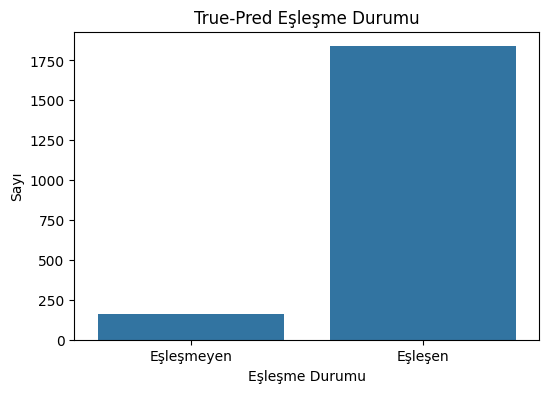

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

df_val['match'] = df_val['emotion_true'] == df_val['emotion_pred']
summary = df_val['match'].value_counts()

# Grafikleri çizin
plt.figure(figsize=(6, 4))
sns.barplot(x=summary.index, y=summary.values)
plt.xlabel('Eşleşme Durumu')
plt.ylabel('Sayı')
plt.title('True-Pred Eşleşme Durumu')
plt.xticks([1, 0], ['Eşleşen', 'Eşleşmeyen'])

# Grafikleri gösterin
plt.show()

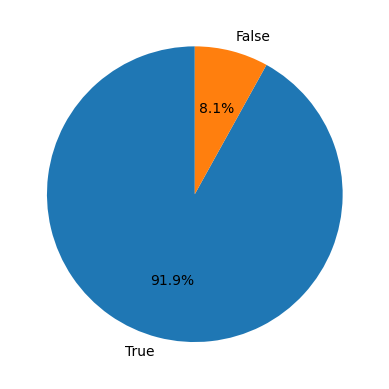

In [136]:
plt.pie(summary.values, labels=summary.index, autopct='%1.1f%%', startangle=90);

### Sonuç: 
Geliştirilen model Validation veri setinde %91.9 doğru tahmin oranı yakalamıştır.
<br> Modeli kaydedip daha sonra Streamlit uygulamasına dönüştürelim ve Hugging Face'de yayımlayalım.
<br><br>Hazırlanan uygulamaya <a href="https://huggingface.co/spaces/abdullatifkaban/Text_Emotions_Classifier" target=_blank>
<u>Hugging Face</u></a> üzerinden ulaşılabilir.

In [138]:
model.save("emotion_model.h5")